In [25]:
import pandas as pd
import re
import numpy as np
import plotly.express as px
import traceback
import logging
import matplotlib.pyplot as plt
import seaborn as sns

# Set up basic logging configuration
logging.basicConfig(
    level=logging.INFO,                     # Set the logging level to INFO
    format='%(asctime)s - %(levelname)s - %(message)s',  # Customize the log format
    handlers=[logging.StreamHandler()]      # Ensure logs are sent to the console (Jupyter output)
)
logging.info("Importing required libraries.. ")

2024-08-31 01:42:56,874 - INFO - Importing required libraries.. 


In [2]:
#Reading Raw CSV file
dataset = pd.read_csv(r"C:\Users\sweth\Desktop\Innomatics\ClassRoom\WebScraping\Project\Naukri_DataAnalysis.csv")

In [3]:
dataset.shape

(1580, 13)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       1580 non-null   object 
 1   WorkMode        1580 non-null   object 
 2   CompanyName     1580 non-null   object 
 3   Rating          1580 non-null   float64
 4   Reviews         1580 non-null   int64  
 5   DaysFrom        1580 non-null   int64  
 6   Min Experience  1580 non-null   int64  
 7   Max Experience  1580 non-null   int64  
 8   Min Salary      160 non-null    float64
 9   Max Salary      160 non-null    float64
 10  Skills          1580 non-null   object 
 11  Locations       1580 non-null   object 
 12  Qualification   1580 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 160.6+ KB


In [5]:
dataset.isna().any()

Job Title         False
WorkMode          False
CompanyName       False
Rating            False
Reviews           False
DaysFrom          False
Min Experience    False
Max Experience    False
Min Salary         True
Max Salary         True
Skills            False
Locations         False
Qualification     False
dtype: bool

In [6]:
dataset.isnull().sum()

Job Title            0
WorkMode             0
CompanyName          0
Rating               0
Reviews              0
DaysFrom             0
Min Experience       0
Max Experience       0
Min Salary        1420
Max Salary        1420
Skills               0
Locations            0
Qualification        0
dtype: int64

## Data Analysis

### Uni variant Analysis

In [7]:
dataset.groupby('WorkMode').count()
mode= dataset['WorkMode'].value_counts().rename_axis('Work Mode').reset_index(name='Count')
mode.style.background_gradient(cmap='Greys')

,Work Mode,Count
0,Work From Office,1300
1,Hybrid,260
2,Remote,20


### Observations
1. More jobs are from Work from office 
2. There are moderate jobs for Hybrid
3. very few/less jobs available for Remote

In [8]:
min_exp = dataset['Min Experience'].value_counts().rename_axis('Min Exp').reset_index(name='Count')
min_exp.style.background_gradient(cmap='YlOrRd', subset=['Count'])

,Min Exp,Count
0,3,420
1,5,320
2,0,220
3,2,140
4,1,140
5,6,120
6,4,120
7,7,60
8,12,20
9,13,20


### Observation:

1. There are more number of jobs available in market for 3 and followed by 5 years
2. Moderate jobs are available for freshers which are internships
3. For high experienced are there very few jobs are available 

In [9]:
max_exp = dataset['Max Experience'].value_counts().rename_axis('Max Exp').reset_index(name='Count')
max_exp.style.background_gradient(cmap='PuBu', subset=['Count'])

,Max Exp,Count
0,8,360
1,5,320
2,10,220
3,7,160
4,3,80
5,4,80
6,0,60
7,9,60
8,2,60
9,11,40


### Observation:
1. There are more number of jobs available in market for max experience 8 and followed by 5 years
2. Moderate jobs are available for freshers which are internships
3. For high experienced more than 15 years are there very few jobs are available

In [10]:
def get_cities(city_dict,cities):
    
    for city in cities.split(','):
        city = city.strip()
        if city in city_dict:
            city_dict[city] += 1
        else:
            city_dict[city] = 1
    return city_dict
city_dict = {}
dict_data = dataset['Locations'].apply(lambda x : get_cities(city_dict, x))
cities_df = pd.DataFrame(list(city_dict.items()), columns=['Cities', 'Count'])
cities_df.sort_values(by='Count', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Greys')
# cities_df.

,Cities,Count
0,Hyderabad,960
1,Bengaluru,620
2,Chennai,220
3,Mumbai,160
4,Pune,120
5,Delhi,120
6,Gurugram,100
7,Noida,80
8,Kolkata,40
9,Kochi,20


In [11]:
def get_cities(city_dict,cities):
    
    for city in cities.split(','):
        city = city.strip()
        if city in city_dict:
            city_dict[city] += 1
        else:
            city_dict[city] = 1
    return city_dict
city_dict = {}
dict_data = dataset['Locations'].apply(lambda x : get_cities(city_dict, x))
cities_df = pd.DataFrame(list(city_dict.items()), columns=['Cities', 'Count'])
cities_df.sort_values(by='Count', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Greys')
# cities_df.

,Cities,Count
0,Hyderabad,960
1,Bengaluru,620
2,Chennai,220
3,Mumbai,160
4,Pune,120
5,Delhi,120
6,Gurugram,100
7,Noida,80
8,Kolkata,40
9,Kochi,20


In [12]:
Observations:

1. Highest number of jobs are in Hyderabad and followed Bengaluru
2. Lowest jobs are available in Jammu & 

SyntaxError: invalid syntax (3571595400.py, line 1)

In [ ]:
dataset.isnull().sum()

# Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset

### Companies

In [ ]:
dataset['CompanyName'].unique

In [ ]:
dataset['CompanyName'].nunique()

In [ ]:
dataset['CompanyName'].value_counts()

In [ ]:
plt.figure(figsize = (20,10))

chart = sns.countplot(x = dataset['CompanyName'], orient = 'h')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

### Observations

1. IBM is offering more number of vacancies among all the compaines. 
2. Accenture & CARBYNETECH companies vacancies less than IBM and greater than other compaines 

In [ ]:
dataset['Reviews'].describe()

In [ ]:
plt.hist(dataset['Rating'])
plt.show()

In [ ]:
dataset['Rating'].mean()

In [ ]:
dataset['Rating'].median()

In [ ]:
dataset['Rating'].mode()

In [ ]:
dataset['Rating'].max()

In [ ]:
sns.kdeplot(dataset['Rating'])

In [ ]:

sns.boxplot(data=dataset['Rating'], orient='h')

### Observations

1. Maximum number of ratings exists between 3.5 to 4.5

In [ ]:
dataset[dataset['Rating']>4.6]

In [ ]:
dataset['Rating'].skew()  # Negatively highly skewed--> 

#### Numerical vs Categorical

In [ ]:
gp_company = dataset.groupby("CompanyName")

In [ ]:
logging.info("The average rating of top 15 companies")

gp_company["Rating"].median().sort_values(ascending = False).head(15)

In [ ]:
dataset

In [ ]:

skills = dataset['Skills'].str.lower().str.split(',', expand=True).stack().str.strip()
most_demanding_skill = skills.value_counts().idxmax()

logging.info(f"The most demanding skill is: {most_demanding_skill}")


In [ ]:
# Plot the most demanding skills
plt.figure(figsize=(10, 6))
top_skills = skills.value_counts().head(10)
ax = top_skills.plot(kind='bar', color='skyblue')
plt.title = 'Top 10 Most Demanding Skills'
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Annotate counts on the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

In [ ]:
# Find the job with the minimum experience
min_experience = dataset['Min Experience'].min()
most_demanding_job_min_exp = dataset[dataset['Min Experience'] == min_experience]['Job Title'].value_counts().idxmax()

print(f"The most demanding job with minimum experience ({min_experience} years) is: {most_demanding_job_min_exp}")


In [ ]:
# Filter jobs with minimum experience and get the top 10 most demanding jobs
jobs_min_exp = dataset[dataset['Min Experience'] == min_experience]['Job Title'].value_counts().head(10)

# Extract minimum experience for these top job titles
min_exp_for_jobs = dataset.groupby('Job Title')['Min Experience'].min().loc[jobs_min_exp.index]

plt.figure(figsize=(10, 8))
ax = jobs_min_exp.plot(kind='bar', color='lightcoral')
plt.title = 'Top 10 Most Demanding Jobs with Minimum Experience'
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Annotate counts and minimum experience on the bars
for idx, value in enumerate(jobs_min_exp):
    job_title = jobs_min_exp.index[idx]
    min_exp = min_exp_for_jobs[job_title]
    ax.text(idx, value + 0.2, f'{value} jobs\nMin Exp: {min_exp} yrs', ha='center', va='bottom', fontsize=9)

plt.show()

In [ ]:
# Find Job with Min Experience with Max Salary 

min_experience = dataset['Min Experience'].min()
filtered_dataset = dataset[dataset['Min Experience'] == min_experience]

# # Find the job with the maximum salary in this filtered dataset
job_with_max_salary_min_exp = filtered_dataset.loc[filtered_dataset['Max Salary'].idxmax()]

# max_salary_min_exp = job_with_max_salary_min_exp['Max Salary']
# job_role = job_with_max_salary_min_exp['Job Title']

companyName = job_with_max_salary_min_exp['CompanyName']

logging.info(f"The job role with the maximum salary ({max_salary_min_exp}) with minimum experience ({min_experience} years)")
logging.info(f"Job role is: ({job_role}) and company Name: ({companyName})")


In [ ]:
# Corrected crosstab code
recent = dataset[dataset['DaysFrom'] <= 5]
job_posting_crosstab = pd.crosstab(index=recent['CompanyName'], columns=recent['DaysFrom'])[:15]
job_posting_crosstab

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(job_posting_crosstab, annot=True, cmap='YlGnBu', fmt='d')
plt.title = 'Job Postings by Company in the Last 3 Days'
plt.xlabel('Days From Posting')
plt.ylabel('Company Name')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Max Salary vs. Max Experience
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Max Experience'], dataset['Max Salary'], alpha=0.5, c='blue')
plt.title = 'Scatter Plot of Max Salary vs. Max Experience'
plt.xlabel('Max Experience (Years)')
plt.ylabel('Max Salary')
plt.grid(True)
plt.show()


In [ ]:
# Filter data for Data Scientist roles
data_scientist = dataset[dataset['Job Title'] == 'Data Scientist']

# Box plot for Min Experience and Max Experience
plt.figure(figsize=(10, 6))
plt.boxplot([data_scientist['Min Experience'].dropna(), data_scientist['Max Experience'].dropna()],
            labels=['Min Experience', 'Max Experience'])
plt.title ='Box Plot of Min and Max Experience for Data Scientist Roles'
plt.ylabel('Experience (Years)')
plt.grid(True)
plt.show()


In [ ]:
# Histogram of Company Ratings
plt.figure(figsize=(10, 6))
plt.hist(dataset['Rating'].dropna(), bins=10, color='green', edgecolor='black')
plt.title='Distribution of Company Ratings'
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


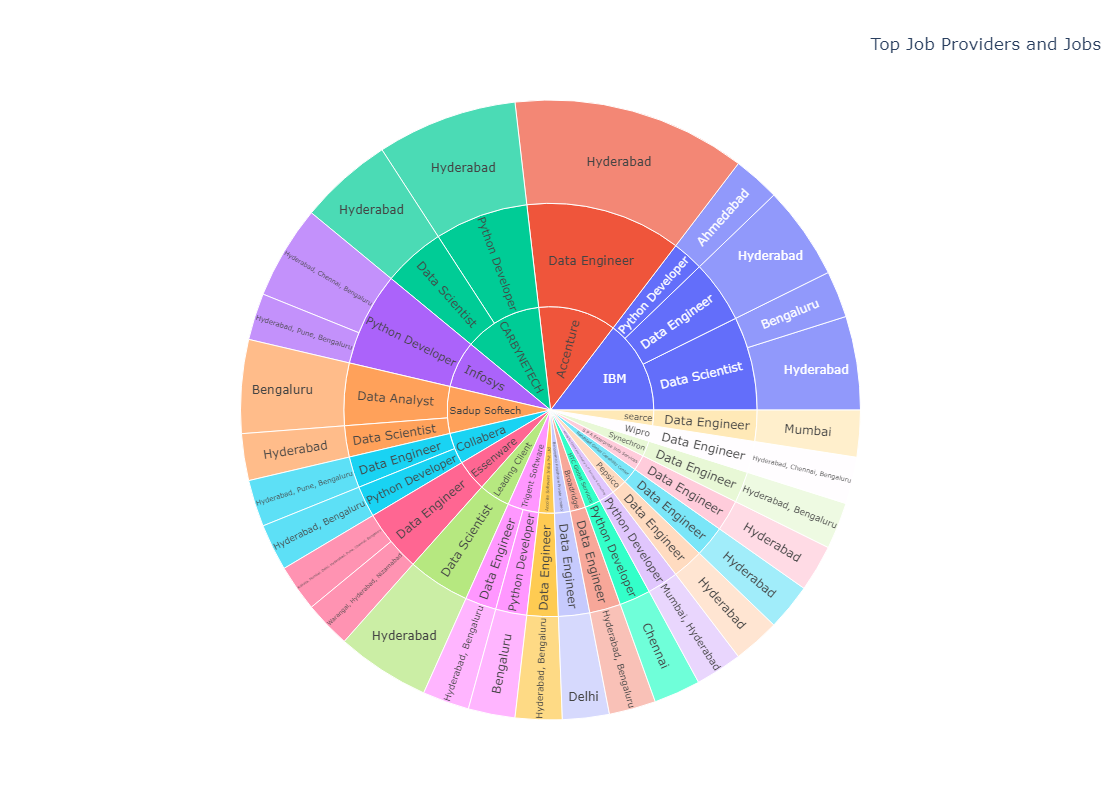

In [17]:
# Filter top 20 companies by the number of job postings
top_20_companies = dataset['CompanyName'].value_counts().head(20).index
top_20_data = dataset[dataset['CompanyName'].isin(top_20_companies)]

# Create a sunburst chart
fig1 = px.sunburst(top_20_data,
                  path=['CompanyName','Job Title','Locations'],
                  title='Sunburst Chart of Top 20 Companies by Location, Job Title, and Skill Set',
                  maxdepth=-1)  # Show all levels

fig1.update_layout(
    autosize=False,
    title_text='Top Job Providers and Jobs',
    title_x=1,
    width=1100,
    height=800)

fig1.show()




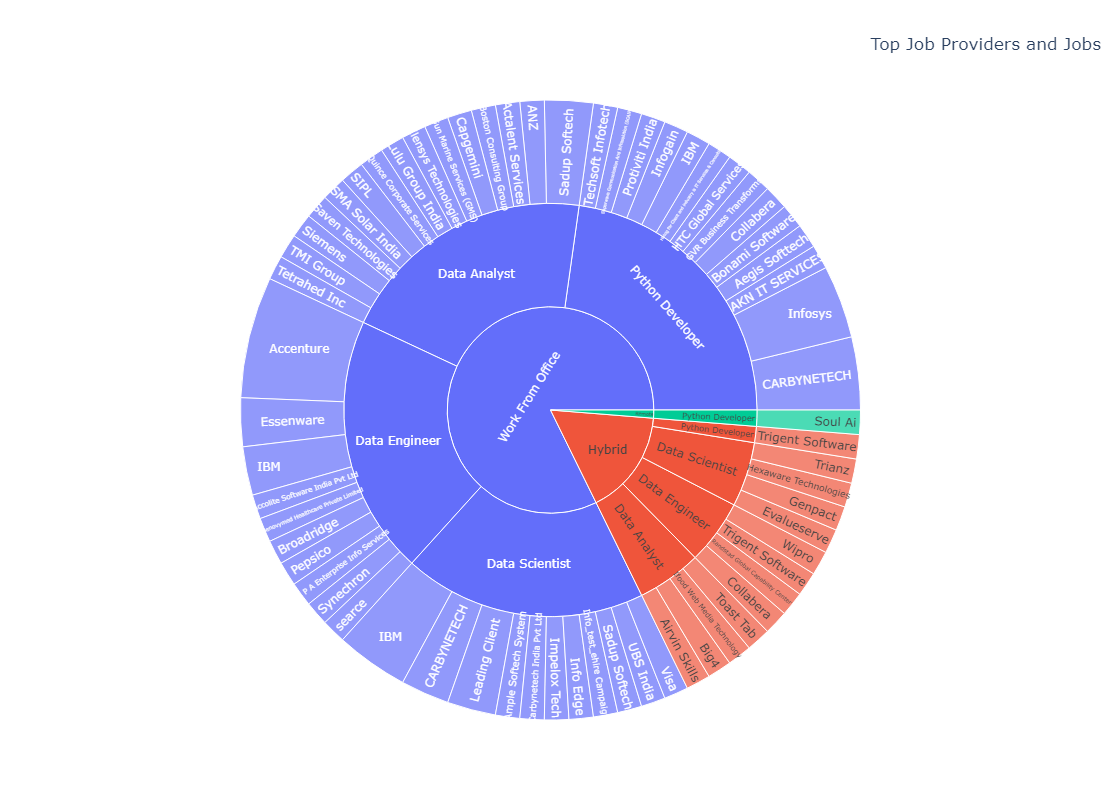

In [19]:
# Filter top 20 companies by the number of job postings
top_20_companies = dataset['CompanyName'].value_counts().head(20).index
top_20_data = dataset[dataset['CompanyName'].isin(top_20_companies)]

# Create a sunburst chart
fig1 = px.sunburst(dataset,
                  path=['WorkMode', 'Job Title', 'CompanyName'],
                  title='Sunburst Chart of Top 10 Companies by WorkMode, Job Title, and Company Name',
                  maxdepth=-1)  # Show all levels

fig1.update_layout(
    autosize=False,
    title_text='Top Job Providers and Jobs',
    title_x=1,
    width=1100,
    height=800)

fig1.show()




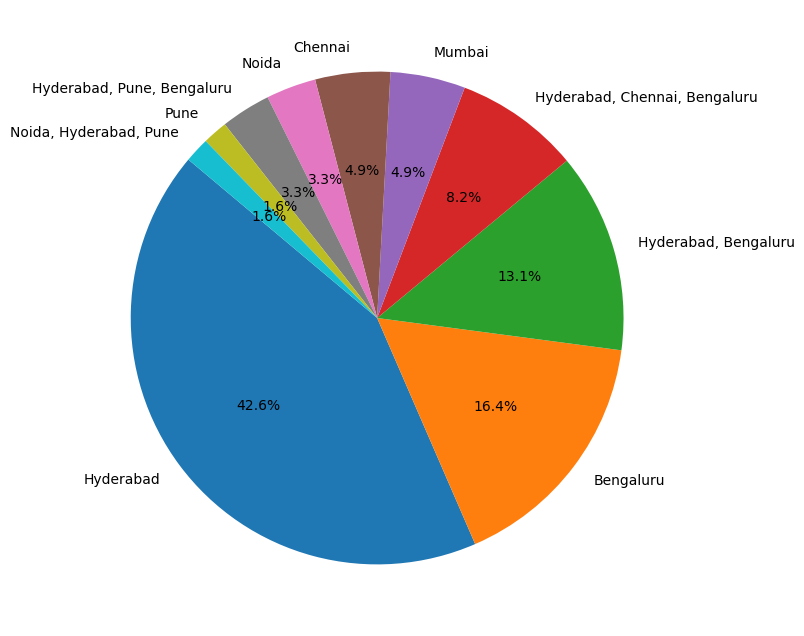

In [24]:
# Count the number of job postings per location (city)
locations_data = dataset.groupby('Locations')['CompanyName'].count().sort_values(ascending=False).head(10)

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(locations_data, labels=locations_data.index, autopct='%1.1f%%', startangle=140)
plt.title = 'Pie Chart of Job Postings by Locations/Cities'
plt.show()
